### Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("/Users/mbouch17/Downloads/amz_uk_price_prediction_dataset.csv")

#----------------------------------------------------#

df.head()
df.dtypes
df.select_dtypes("number").nunique().sort_values(ascending=False)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [19]:
df.shape

(2443651, 9)

In [59]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()
top_5_categories = frequency_table.head(5)

# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)
proportion_table.head(5)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

/var/folders/t2/40gs14tj4lg2536r26vzcyv40000gn/T/ipykernel_1004/2002955025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_categories.index, x=top_5_categories.values, palette="Set3");


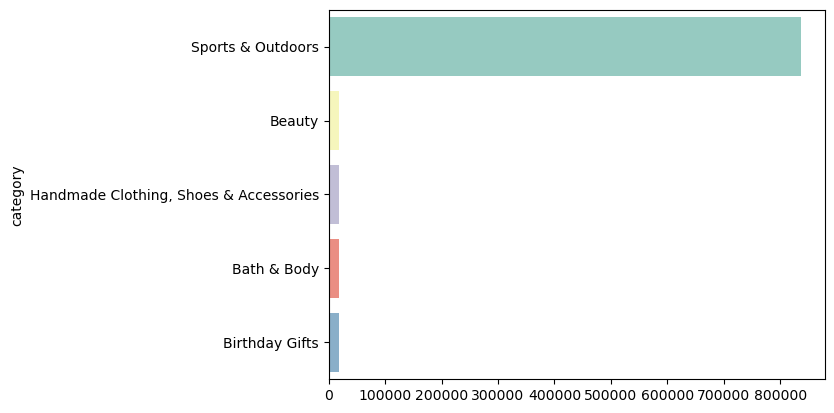

In [68]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(y=top_5_categories.index, x=top_5_categories.values, palette="Set3");

In [ ]:
#'Sports & Outdoors' category clearly dominated the listing with 34 % (as per pie chart observation)

## Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [72]:
df['price'].mean()

89.24380943923663

In [74]:
df['price'].median()

19.09

In [78]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

In [ ]:
# The price product mean is (89,34$) is much higher than the median and modes, which indicates a uneven distribution of the prices.
# Outliers are clearly pulling up the mean towards more extreme (hight in that case) values

In [86]:
df['price'].var()

119445.4853225653

In [84]:
df['price'].std()

345.6088617535223

In [95]:
range = df['price'].max() - df['price'].min()
range

100000.0

In [98]:
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
quantiles_price

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

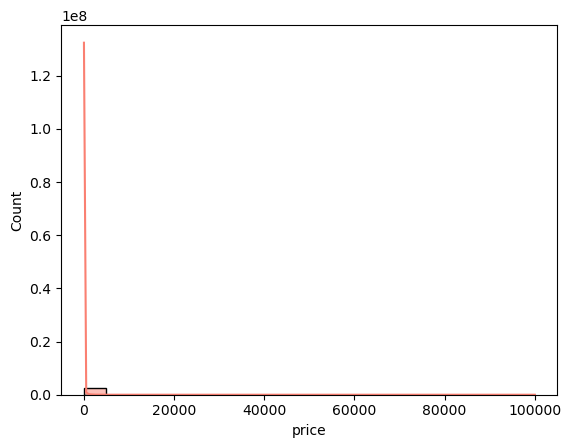

In [113]:
sns.histplot(df['price'], kde=True, bins=20, color="salmon")

<Axes: ylabel='price'>

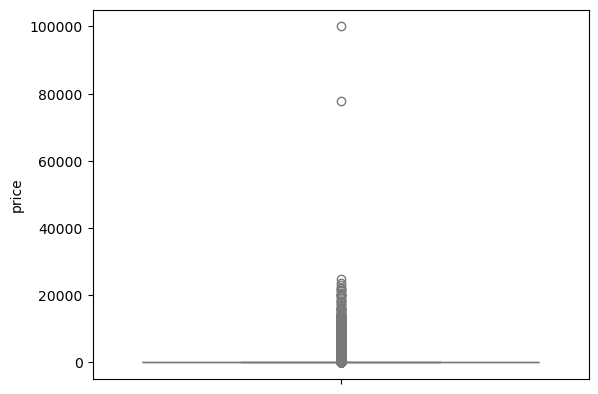

In [116]:
sns.boxplot(data = df['price'], color="lightblue")

## Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [118]:
df['stars'].mean()

2.152836472966065

In [120]:
df['stars'].median()

0.0

In [122]:
df['stars'].mode()

0    0.0
Name: stars, dtype: float64

In [124]:
df['stars'].var()

4.81743402976196

In [126]:
df['stars'].std()

2.1948653785054697

In [128]:
range = df['stars'].max() - df['stars'].min()
range

5.0

In [130]:
quantiles_price = df['stars'].quantile([0.25, 0.5, 0.75])
quantiles_price

0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64

In [145]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

In [ ]:
#The distribution is rather normal and Symmetrical as the Skewness is very close to 0 (skewness=0.008)
# This is a Platykurtic distribution with a Thinner tails as Kurtosis<0 (kurtosis=-1.93)

<Axes: xlabel='stars', ylabel='Count'>

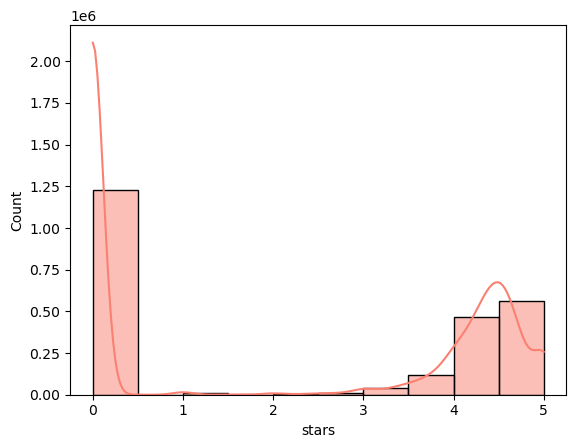

In [140]:
sns.histplot(df['stars'], kde=True, bins=10, color="salmon")

<Axes: ylabel='stars'>

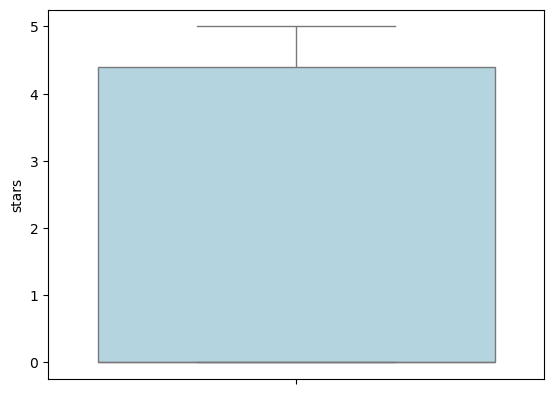

In [133]:
sns.boxplot(data = df['stars'], color="lightblue")

In [ ]:
#The most coomon rating is 5. 
#Note that there is a lot of Null values that have been classified as '0'. 
#These null values should have been dropped for a better analysis.